# PROJECT : NBA DRAFT(KAGGLE COMPETITION)-- WEEK_4--CUSTOMPACKAGE


### Student Name : Mahjabeen Mohiuddin
### Student_Id: 24610507
### Course : Data Science and Innovation



## Topics of the Project:
### 1. Importing Packages from sklearn, testpypi.org and loading datasets into dataframes
### 2. Data Cleaning Process
### 3.Exploratory Data Analysis 
### 4. Splitting train dataset into feature and target, andScaling of Data using Standard Scaler
### 5. Sampling of Data Using Smote and Spliting data into train and validation set
### 6. Baseline Model Performance
### 7. Models 1: 
       1. NullBinaryClassifier :BaseLine Model

     ### Model :  
       2. Mutli Layer Perception (MLP) Classification
       3. Probability and Au_Roc Score

         


### Package Installation Link: 
### pip install -i https://test.pypi.org/simple/ uts-mahe-binaryclassifier-24610507-0.1.3

### Github_link :   https://github.com/MAHJABEENMOHIUDDIN/Adv_ML_Project_Community_Prediction_Competition/tree/master
   

# Topic 1:
  ## [1.1] Importing Pandas and numpy

In [229]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.metrics import roc_auc_score



## [1.2] Loading Datasets and Custom Package from testpypi.org

#### To import my custom package run this code

##### Inside your notebook, it should be: pip install -i https://test.pypi.org/simple/ uts-mahe-binaryclassifier-24610507-0.1.3

##### Via Poetry, it should be: poetry run pip install -i https://test.pypi.org/simple/ uts-mahe-binaryclassifier-24610507-0.1.3

In [230]:
train_df= pd.read_csv('../data/raw/Adv_ML_Project_Community_Predict_Competition_train.csv')

/var/folders/9c/b8x7cjsj3ns9391k_v_4_3dr0000gn/T/ipykernel_91346/299726252.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df= pd.read_csv('../data/raw/Adv_ML_Project_Community_Predict_Competition_train.csv')


In [231]:
train_df.shape


(56091, 64)

In [232]:
train_df.columns

Index(['team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per',
       'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per',
       'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per',
       'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe', 'pfr', 'year',
       'type', 'Rec_Rank', 'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade',
       'midmade_midmiss', 'rim_ratio', 'mid_ratio', 'dunksmade',
       'dunksmiss_dunksmade', 'dunks_ratio', 'pick', 'drtg', 'adrtg',
       'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm',
       'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk', 'pts',
       'player_id', 'drafted'],
      dtype='object')

In [233]:
train_df

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,Niagara,MAAC,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,...,-17.439600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,9eded9ee-0eb4-49f4-914a-f58924797bdf,0.0
56087,Northwestern St.,Slnd,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,...,9.392350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,5b539feb-1736-44ed-ba62-82bce86b12d6,0.0
56088,Texas Southern,SWAC,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,...,-3.240610,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,e95d08eb-1273-4094-9173-c47368222c0d,0.0
56089,Vanderbilt,SEC,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,...,16.362500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,2f315a7b-2e82-44a2-8597-1779102ace09,0.0


#### Importing testing dataset

In [234]:
test_df= pd.read_csv('../data/raw/Adv_ML_Project_Community_Predict_Competition_test.csv')

In [235]:
test_df.shape

(4970, 63)

### [1.3] Displaying head of DataFrame 

In [236]:
train_df.head()

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
0,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,7be2aead-da4e-4d13-a74b-4c1e692e2368,0.0
1,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,61de55d9-1582-4ea4-b593-44f6aa6524a6,0.0
2,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,efdc4cfc-9dd0-4bf8-acef-7273e4d5b655,0.0
3,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,14f05660-bb3c-4868-b3dd-09bcdb64279d,0.0
4,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,a58db52f-fbba-4e7b-83d0-371efcfed039,0.0


### [1.4]Displaying Dimensions of data frame

In [237]:
train_df.shape

(56091, 64)

### [1.5]Summary of data frame

In [238]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 64 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   team                 56091 non-null  object 
 1   conf                 56091 non-null  object 
 2   GP                   56091 non-null  int64  
 3   Min_per              56091 non-null  float64
 4   Ortg                 56091 non-null  float64
 5   usg                  56091 non-null  float64
 6   eFG                  56091 non-null  float64
 7   TS_per               56091 non-null  float64
 8   ORB_per              56091 non-null  float64
 9   DRB_per              56091 non-null  float64
 10  AST_per              56091 non-null  float64
 11  TO_per               56091 non-null  float64
 12  FTM                  56091 non-null  int64  
 13  FTA                  56091 non-null  int64  
 14  FT_per               56091 non-null  float64
 15  twoPM                56091 non-null 

#### [1.6] Displaying Descriptive Statistics of Data Frame

In [239]:
train_df.describe(include = 'all')

,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,player_id,drafted
count,56091,56091,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,56091.000000,...,56047.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56053.000000,56091,56091.000000
unique,358,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23929,NaN
top,Army,ACC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06dc8dc2-888e-4941-9106-4798cddfb9d2,NaN
freq,209,2297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,NaN
mean,NaN,NaN,23.411973,37.325229,91.858295,18.149265,44.575513,47.676882,5.575376,12.673716,...,-0.442297,0.770611,1.892593,2.663204,1.073038,0.529475,0.282825,5.775381,NaN,0.009556
std,NaN,NaN,10.090542,28.061897,30.538819,6.204489,18.213813,17.414133,9.480239,10.878099,...,3.279438,0.738899,1.479148,2.099913,1.171148,0.469152,0.417754,4.953723,NaN,0.097287
min,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-100.984000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,NaN,16.000000,9.500000,84.100000,14.500000,40.100000,43.930000,1.800000,8.400000,...,-1.728030,0.225800,0.700000,1.000000,0.222200,0.160000,0.000000,1.571400,NaN,0.000000
50%,NaN,NaN,28.000000,35.900000,97.100000,18.100000,47.700000,50.850000,4.300000,11.900000,...,-0.313051,0.545500,1.633300,2.259300,0.677400,0.424200,0.133300,4.482800,NaN,0.000000
75%,NaN,NaN,31.000000,62.200000,106.900000,21.800000,53.200000,56.060000,8.100000,16.000000,...,1.066415,1.111100,2.758600,3.833300,1.533300,0.793100,0.366700,9.069000,NaN,0.000000


## 2. Data Processing

### [2.1] Creating a copy of train and test dataframe as clean_train_df and test_df

In [240]:
cleaned_train_df_=train_df.copy()


In [241]:
cleaned_test_df = test_df.copy()

### [2.1] Dropping columns from training and testing sets

In [242]:
train_droplist=['team','conf', 'stl_per','yr','ht','num', 'porpag','adjoe', 'year','type','adrtg','dporpag', 'player_id']
cleaned_train_df= cleaned_train_df_.drop(columns=train_droplist)
cleaned_train_df

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
0,26,29.5,97.3,16.6,42.5,44.43,1.6,4.6,15.8,16.3,...,-2.781990,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,0.0
1,34,60.9,108.3,14.9,52.4,54.48,3.8,6.3,13.6,19.8,...,-0.052263,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,0.0
2,27,72.0,96.2,21.8,45.7,47.98,2.1,8.0,14.7,15.9,...,1.548230,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,0.0
3,30,44.5,97.7,16.0,53.6,53.69,4.1,9.4,13.7,23.8,...,-0.342775,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,0.0
4,33,56.2,96.5,22.0,52.8,54.31,8.3,18.6,8.2,22.7,...,-1.684860,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56086,1,0.1,0.0,48.9,0.0,0.00,0.0,0.0,0.0,0.0,...,-22.468800,-17.439600,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
56087,1,0.2,206.9,35.9,100.0,102.56,0.0,0.0,0.0,0.0,...,35.683300,9.392350,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.0000,0.0
56088,1,0.6,48.5,28.9,0.0,52.63,0.0,15.9,0.0,52.9,...,-13.372700,-3.240610,0.0000,1.0000,1.0000,0.0000,0.0000,0.0000,2.0000,0.0
56089,1,0.1,300.0,20.0,150.0,150.00,0.0,0.0,0.0,0.0,...,94.422600,16.362500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.0000,0.0


In [243]:
cleaned_train_df.columns

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FTM', 'FTA', 'FT_per', 'twoPM', 'twoPA',
       'twoP_per', 'TPM', 'TPA', 'TP_per', 'blk_per', 'ftr', 'pfr', 'Rec_Rank',
       'ast_tov', 'rimmade', 'rimmade_rimmiss', 'midmade', 'midmade_midmiss',
       'rim_ratio', 'mid_ratio', 'dunksmade', 'dunksmiss_dunksmade',
       'dunks_ratio', 'pick', 'drtg', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'drafted'],
      dtype='object')

In [244]:
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   56091 non-null  int64  
 1   Min_per              56091 non-null  float64
 2   Ortg                 56091 non-null  float64
 3   usg                  56091 non-null  float64
 4   eFG                  56091 non-null  float64
 5   TS_per               56091 non-null  float64
 6   ORB_per              56091 non-null  float64
 7   DRB_per              56091 non-null  float64
 8   AST_per              56091 non-null  float64
 9   TO_per               56091 non-null  float64
 10  FTM                  56091 non-null  int64  
 11  FTA                  56091 non-null  int64  
 12  FT_per               56091 non-null  float64
 13  twoPM                56091 non-null  int64  
 14  twoPA                56091 non-null  int64  
 15  twoP_per             56091 non-null 

In [245]:
cleaned_train_df.shape

(56091, 51)

In [246]:
test_droplist =['team','conf', 'stl_per','yr','ht','num', 'porpag','adjoe', 'year','type','adrtg','dporpag', 'player_id']
cleaned_test_df = cleaned_test_df.drop(columns=test_droplist)
cleaned_test_df

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,...,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts
0,2,3.0,115.1,4.7,50.0,50.00,0.0,4.6,0.0,0.0,...,10.0000,-2.467740,-2.275660,0.0000,0.3333,0.3333,0.0000,0.0000,0.0000,1.0000
1,11,17.6,61.1,18.6,34.7,35.18,2.5,15.7,8.1,30.4,...,11.5455,-7.494720,-4.412530,0.2727,1.4545,1.7273,0.4545,0.1818,0.0000,2.3636
2,9,28.6,91.9,23.8,54.1,52.49,6.4,22.5,10.0,21.9,...,23.3333,-2.924950,1.717890,1.3333,4.4444,5.7778,1.0000,0.6667,1.8889,8.8889
3,7,1.3,111.0,10.4,83.3,83.33,0.0,13.4,0.0,33.6,...,2.2857,-0.767911,0.962469,0.0000,0.2857,0.2857,0.0000,0.0000,0.0000,0.7143
4,23,78.5,103.1,21.5,54.0,56.12,3.6,10.2,7.8,16.1,...,32.7826,2.893610,-1.019000,1.0435,2.8696,3.9130,1.1739,0.8261,0.0870,14.3043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4965,2,0.3,60.5,19.3,0.0,0.00,0.0,0.0,51.1,0.0,...,1.5000,2.143290,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000
4966,4,1.3,28.3,7.1,0.0,0.00,7.0,0.0,0.0,50.3,...,3.7500,-7.242230,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000
4967,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1.0000,-3.524820,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
4968,1,0.1,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,...,1.0000,-1.876040,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [247]:
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   56091 non-null  int64  
 1   Min_per              56091 non-null  float64
 2   Ortg                 56091 non-null  float64
 3   usg                  56091 non-null  float64
 4   eFG                  56091 non-null  float64
 5   TS_per               56091 non-null  float64
 6   ORB_per              56091 non-null  float64
 7   DRB_per              56091 non-null  float64
 8   AST_per              56091 non-null  float64
 9   TO_per               56091 non-null  float64
 10  FTM                  56091 non-null  int64  
 11  FTA                  56091 non-null  int64  
 12  FT_per               56091 non-null  float64
 13  twoPM                56091 non-null  int64  
 14  twoPA                56091 non-null  int64  
 15  twoP_per             56091 non-null 

In [248]:
cleaned_train_df.isna().sum()

GP                         0
Min_per                    0
Ortg                       0
usg                        0
eFG                        0
TS_per                     0
ORB_per                    0
DRB_per                    0
AST_per                    0
TO_per                     0
FTM                        0
FTA                        0
FT_per                     0
twoPM                      0
twoPA                      0
twoP_per                   0
TPM                        0
TPA                        0
TP_per                     0
blk_per                    0
ftr                        0
pfr                        0
Rec_Rank               39055
ast_tov                 4190
rimmade                 6081
rimmade_rimmiss         6081
midmade                 6081
midmade_midmiss         6081
rim_ratio               9464
mid_ratio               9688
dunksmade               6081
dunksmiss_dunksmade     6081
dunks_ratio            30793
pick                   54705
drtg          

In [249]:
cleaned_train_df.isna().sum().sum()

185037

1. Custom Function

### [2.2]  Replace null values in columns with their mean using custom function  

In [250]:
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   56091 non-null  int64  
 1   Min_per              56091 non-null  float64
 2   Ortg                 56091 non-null  float64
 3   usg                  56091 non-null  float64
 4   eFG                  56091 non-null  float64
 5   TS_per               56091 non-null  float64
 6   ORB_per              56091 non-null  float64
 7   DRB_per              56091 non-null  float64
 8   AST_per              56091 non-null  float64
 9   TO_per               56091 non-null  float64
 10  FTM                  56091 non-null  int64  
 11  FTA                  56091 non-null  int64  
 12  FT_per               56091 non-null  float64
 13  twoPM                56091 non-null  int64  
 14  twoPA                56091 non-null  int64  
 15  twoP_per             56091 non-null 

In [251]:
from uts_mahe_binaryclassifier_24610507.data.sets import median_null

In [252]:
cleaned_train_df=median_null(cleaned_train_df,'Rec_Rank')
cleaned_train_df=median_null(cleaned_train_df,'ast_tov')
cleaned_train_df=median_null(cleaned_train_df,'rimmade')
cleaned_train_df=median_null(cleaned_train_df,'rimmade_rimmiss')
cleaned_train_df=median_null(cleaned_train_df,'midmade_midmiss')

In [253]:
cleaned_train_df.drafted.info()

<class 'pandas.core.series.Series'>
RangeIndex: 56091 entries, 0 to 56090
Series name: drafted
Non-Null Count  Dtype  
--------------  -----  
56091 non-null  float64
dtypes: float64(1)
memory usage: 438.3 KB


In [254]:
cleaned_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56091 entries, 0 to 56090
Data columns (total 51 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   GP                   56091 non-null  int64  
 1   Min_per              56091 non-null  float64
 2   Ortg                 56091 non-null  float64
 3   usg                  56091 non-null  float64
 4   eFG                  56091 non-null  float64
 5   TS_per               56091 non-null  float64
 6   ORB_per              56091 non-null  float64
 7   DRB_per              56091 non-null  float64
 8   AST_per              56091 non-null  float64
 9   TO_per               56091 non-null  float64
 10  FTM                  56091 non-null  int64  
 11  FTA                  56091 non-null  int64  
 12  FT_per               56091 non-null  float64
 13  twoPM                56091 non-null  int64  
 14  twoPA                56091 non-null  int64  
 15  twoP_per             56091 non-null 

In [255]:
cleaned_train_df.isna().sum().sum()

123549

### Replacing nan values with mean value of respective column

In [256]:
from uts_mahe_binaryclassifier_24610507.data.sets import mean_null

In [257]:
cleaned_train_df=mean_null(cleaned_train_df,'mid_ratio')
cleaned_train_df=mean_null(cleaned_train_df,'rim_ratio')
cleaned_train_df=mean_null(cleaned_train_df,'dunksmade')
cleaned_train_df=mean_null(cleaned_train_df,'dunksmiss_dunksmade')
cleaned_train_df=mean_null(cleaned_train_df,'dunks_ratio')
cleaned_train_df=mean_null(cleaned_train_df,'pick')   
cleaned_train_df=mean_null(cleaned_train_df,'midmade')

In [258]:
cleaned_train_df.isna().sum().sum()

656

### Replacing the below columns nan values with median_null and mean_nul custom function with its respective columns from Testing dataframe values

In [259]:
cleaned_test_df=median_null(cleaned_test_df,'Rec_Rank')
cleaned_test_df=median_null(cleaned_test_df,'ast_tov')
cleaned_test_df=median_null(cleaned_test_df,'rimmade')
cleaned_test_df=median_null(cleaned_test_df,'rimmade_rimmiss')
cleaned_test_df=median_null(cleaned_test_df,'midmade_midmiss')
cleaned_test_df=mean_null(cleaned_test_df,'mid_ratio')
cleaned_test_df=mean_null(cleaned_test_df,'rim_ratio')
cleaned_test_df=mean_null(cleaned_test_df,'dunksmade')
cleaned_test_df=mean_null(cleaned_test_df,'dunksmiss_dunksmade')
cleaned_test_df=mean_null(cleaned_test_df,'dunks_ratio')
cleaned_test_df=mean_null(cleaned_test_df,'pick')
cleaned_test_df=mean_null(cleaned_test_df,'midmade')

### [2.3] Replace na with O in the dataset for remaining columns

### Importing "replace_null_with_Zero" custom function to fill nan values with 0.

In [260]:
from uts_mahe_binaryclassifier_24610507.data.sets import replace_null_with_Zero

In [261]:

cleaned_train_df=replace_null_with_Zero(cleaned_train_df)


In [262]:
cleaned_train_df.isna().sum().sum()

0

In [263]:
cleaned_test_df=replace_null_with_Zero(cleaned_test_df)


In [264]:
cleaned_test_df.isna().sum().sum()

0

In [265]:
print(cleaned_train_df)

       GP  Min_per   Ortg   usg    eFG  TS_per  ORB_per  DRB_per  AST_per   
0      26     29.5   97.3  16.6   42.5   44.43      1.6      4.6     15.8  \
1      34     60.9  108.3  14.9   52.4   54.48      3.8      6.3     13.6   
2      27     72.0   96.2  21.8   45.7   47.98      2.1      8.0     14.7   
3      30     44.5   97.7  16.0   53.6   53.69      4.1      9.4     13.7   
4      33     56.2   96.5  22.0   52.8   54.31      8.3     18.6      8.2   
...    ..      ...    ...   ...    ...     ...      ...      ...      ...   
56086   1      0.1    0.0  48.9    0.0    0.00      0.0      0.0      0.0   
56087   1      0.2  206.9  35.9  100.0  102.56      0.0      0.0      0.0   
56088   1      0.6   48.5  28.9    0.0   52.63      0.0     15.9      0.0   
56089   1      0.1  300.0  20.0  150.0  150.00      0.0      0.0      0.0   
56090  19     21.9   55.0  16.4   24.5   30.60      0.6      7.2      9.1   

       TO_per  ...      ogbpm      dgbpm    oreb    dreb    treb     ast   

### [2.3] Remove duplicate rows using function duplicated()

In [266]:
cleaned_train_df.duplicated().sum()

16

In [267]:
cleaned_train_df.drop_duplicates(inplace=True)

In [268]:
#Unit Test
assert cleaned_train_df.duplicated().sum() == 0

In [269]:
cleaned_test_df.duplicated().sum()

4

In [270]:
#cleaned_test_df.drop_duplicates(inplace=True)

In [271]:
#Unit Test
#assert cleaned_test_df.duplicated().sum() == 0

## [3] Exploratory Data Analysis

#### Visualizing number of games played by players.

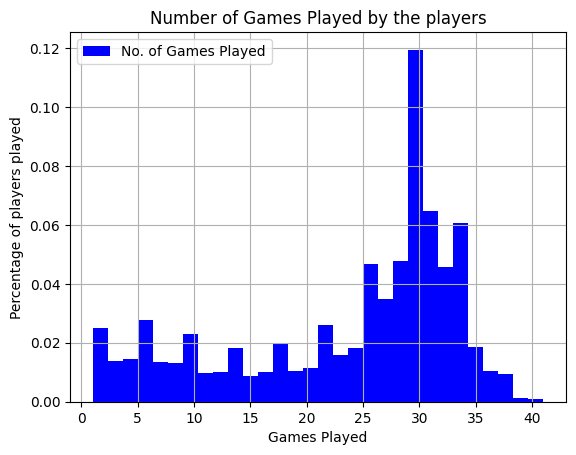

In [272]:
y=cleaned_train_df['GP']

plt.hist(y, bins=30, density=True, alpha=1, color='blue', label='No. of Games Played')

plt.xlabel('Games Played')
plt.ylabel('Percentage of players played')
plt.title('Number of Games Played by the players')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### Visualizing Distribution of Shorts made at or near the Rim by the players.

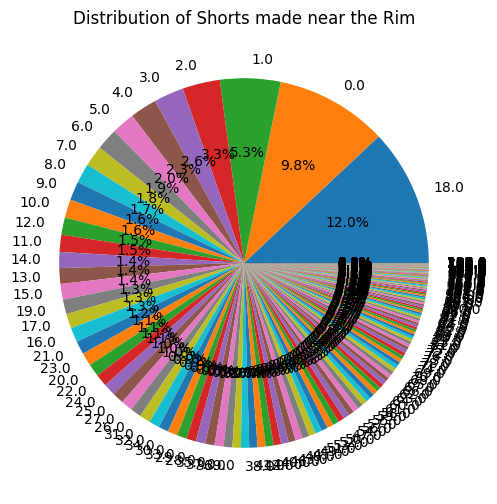

In [273]:
#Pie chart of job categories
job_counts = cleaned_train_df['rimmade'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(job_counts.values, labels=job_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Shorts made near the Rim')
plt.show()



In [274]:
cleaned_train_df.drafted.info()

<class 'pandas.core.series.Series'>
Index: 56075 entries, 0 to 56090
Series name: drafted
Non-Null Count  Dtype  
--------------  -----  
56075 non-null  float64
dtypes: float64(1)
memory usage: 876.2 KB


#### Visualizing Player percentage for minutes played

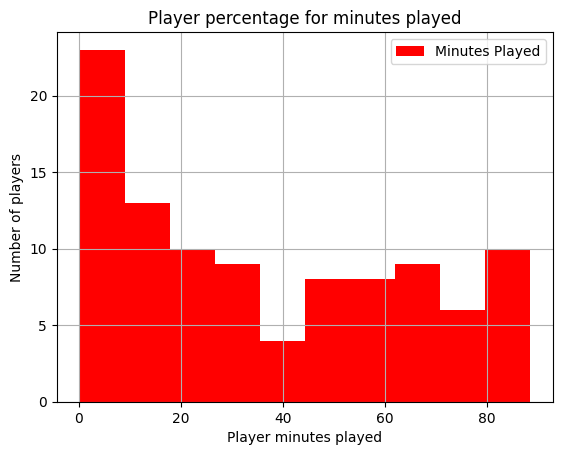

In [275]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some sample data
x = cleaned_train_df['Min_per']
#y = cleaned_train_df['drafted']

# Sample a subset of 100 values
sample_indices = np.random.choice(len(x), 100, replace=False)
x_sampled = x[sample_indices]
#y_sampled = y[sample_indices]

# Create a line plot
#plt.bar(x_sampled, y_sampled, label='Sampled Data', color='blue')
plt.hist(x_sampled, label='Minutes Played', color='Red')
plt.xlabel('Player minutes played')
plt.ylabel('Number of players')
plt.title('Player percentage for minutes played')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### Visualizing Recruiting rank i.e. what the player was ranked as a recruit coming out of high school.

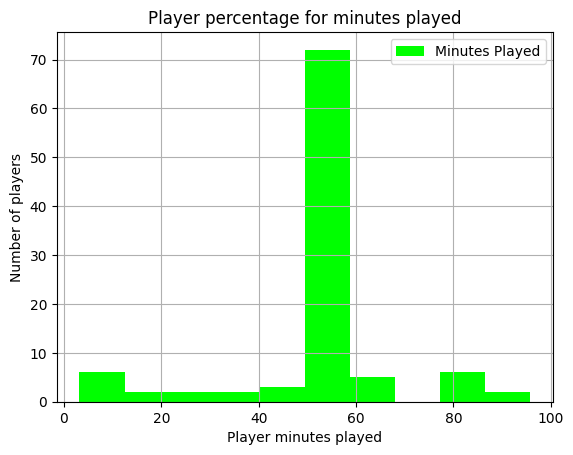

In [276]:
# Generate some sample data
x = cleaned_train_df['Rec_Rank']
#y = cleaned_train_df['drafted']

# Sample a subset of 100 values
sample_indices = np.random.choice(len(x), 100, replace=False)
x_sampled = x[sample_indices]
#y_sampled = y[sample_indices]

# Create a line plot
#plt.bar(x_sampled, y_sampled, label='Sampled Data', color='blue')
plt.hist(x_sampled, label='Minutes Played', color='lime')
plt.xlabel('Player minutes played')
plt.ylabel('Number of players')
plt.title('Player percentage for minutes played')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

#### Visualizing target variable of training dataframe

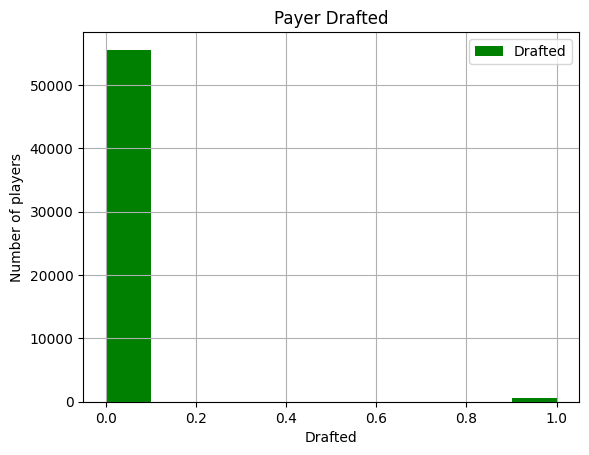

In [277]:
y=cleaned_train_df['drafted']
plt.hist(y, label='Drafted', color='green')
plt.xlabel('Drafted')
plt.ylabel('Number of players')
plt.title('Payer Drafted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()

##  [4] Dropping the drafted column from training dataframe and storing it into train_target using custom function "drop_target"

In [278]:
from uts_mahe_binaryclassifier_24610507.data.sets import drop_target

In [279]:
x,y=drop_target(cleaned_train_df,'drafted')

### [4.1] Importing Standard Scaler from sciketlear for Scaling Data using Standard Scaler.

In [280]:
from sklearn.preprocessing import StandardScaler

### [4.2] Initializing Standard Scalar for train and test dataframes

In [281]:
scaler = StandardScaler()

In [282]:
cleaned_train_df= scaler.fit_transform(cleaned_train_df)

In [283]:
!pip install imbalanced-learn

### [4.3]Importing dump from joblib and dunmping the scaled data

In [284]:
from joblib import dump

In [285]:
dump(scaler, '../models/scaler.joblib')

['../models/scaler.joblib']

## 5. Performing SMOTE Sampling and then splitting the data among train, validation sets

# 5. Sampling

### Importing Smote Sampler

In [286]:

from imblearn.over_sampling import SMOTE
print("Shape of X before SMOTE:{}".format(x.shape))
print("Before Smote count of label '1' : {}".format((y == 1).sum()))
print("Before Smote count of label '0' \n : {}".format((y==0).sum()))

from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='auto', random_state=42, k_neighbors=5, n_jobs=None)
X_smote,y_smote= smote.fit_resample(x,y)

print("Shape of X before SMOTE:{}".format(X_smote.shape))
print("After Smote count of label '1' : {}".format((y == 1).sum()))
print("After Smote count of label '0' \n : {}".format((y==0).sum()))

Shape of X before SMOTE:(56075, 50)
Before Smote count of label '1' : 536
Before Smote count of label '0' 
 : 55539


Shape of X before SMOTE:(111078, 50)
After Smote count of label '1' : 536
After Smote count of label '0' 
 : 55539


### [5.1] Calling random_split_sets custom function to split data into train and validation sets

In [287]:
from uts_mahe_binaryclassifier_24610507.data.sets import random_split_sets

In [288]:
X_train, y_train, X_val, y_val = random_split_sets(X_smote,y_smote ,val_ratio=0.2)

### [5.2] Checking Dimensions of train, validation sets features and target.

In [289]:
print(X_train.shape)
print(X_val.shape)

(88862, 50)
(22216, 50)


In [290]:
print(y_train.shape)
print(y_val.shape)

(88862,)
(22216,)


### [5.3]Import the function `save_sets()` function from my custom package
Saving the train, validation sets into the folder `data/processed`

In [291]:
from uts_mahe_binaryclassifier_24610507.data.sets import save_train_val_sets

In [292]:
save_train_val_sets(X_train, y_train, X_val, y_val, path='../data/processed/') 


In [293]:
save_train_val_sets((X_train).to_csv('../data/processed/X_train.csv', index=False))
save_train_val_sets((X_val).to_csv('../data/processed/X_val.csv', index=False))
save_train_val_sets((y_train).to_csv('../data/processed/y_train.csv', index=False))
save_train_val_sets((y_val).to_csv('../data/processed/y_val.csv', index=False))

In [294]:
#from uts_mahe_binaryclassifier_24610507.data.sets import load_train_val_sets

In [295]:
#X_train, y_train, X_val, y_val = load_train_val_sets(path='../data/processed/')

## 6. Baseline Model

### [6.1] Importing custom class "NullBinaryClassifier"

In [296]:
from uts_mahe_binaryclassifier_24610507.models.null import  NullBinaryClassifier

In [297]:
baseline_model =NullBinaryClassifier()

### [6.2] Make a prediction using `fit_predict()` and save the results in a variable called `y_base`

In [298]:
y_base = baseline_model.fit_predict(y_train)

In [299]:
y_base = baseline_model.fit_predict(y_train)

### [6.3] Import the `print_classifier_scores()` function from custom package

In [300]:
from uts_mahe_binaryclassifier_24610507.models.performance import  print_classifier_scores

### [6.4] Displaying the Accuracy scores and f1 score  of baseline model on the training set using custom function

In [301]:
print_classifier_scores(y_preds=y_base, y_actuals=y_train, set_name='Baseline_Model')

accuracy_score Baseline_Model: 0.500832751907452
f1_score Baseline_Model: 0.0


# 7. Models:

### [7.1] Improting MLPClassifier from scikit-learn

In [302]:
from sklearn.neural_network import MLPClassifier

In [303]:
from uts_mahe_binaryclassifier_24610507.models.performance import fit_assess_classifier

### [7.2] Initiating MLPClassifier class and fitting the data into model using custom function

In [304]:
custom_MLPClassifier=fit_assess_classifier(MLPClassifier(max_iter= 300, solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1), X_train, y_train, X_val, y_val)

accuracy_score Training: 0.891764758839549
f1_score Training: 0.895018337408313
accuracy_score Validation: 0.8904393230104429
f1_score Validation: 0.8946502770083102


### [7.6] Importng `dump` from `joblib` and saving the fitted model into the folder `models` as a file called `Log_reg`

In [305]:

dump(custom_MLPClassifier,  '../models/model_1_MLPClassifier_week4_reg_au_roc_score.joblib')

['../models/model_1_MLPClassifier_week4_reg_au_roc_score.joblib']

### [7.5] Calculating the probability, Au-Roc Score  of player being selected for NBA basketball draf.

In [306]:
test_df_ =cleaned_test_df[X_train.columns]



In [307]:
y_pred_proba = custom_MLPClassifier.predict_proba(test_df_)[::,1]

print("The probability of a player is:",y_pred_proba)

The probability of a player is: [1.04396457e-097 5.25113424e-153 4.95759540e-023 ... 4.89330781e-172
 7.73466945e-162 2.99804606e-095]


In [308]:
data1=test_df['player_id'].to_numpy()
data_frame2=pd.DataFrame(data1)
data_frame2.columns=['player_id']
data_frame2

,player_id
0,cf302b4d-84f7-4124-a25d-a75eed31978b
1,f91837cd-4f49-4b70-963d-aeb82c6ce3da
2,53ec2a29-1e7d-4c6d-86d7-d60d02af8916
3,32402798-471c-4a54-8cb4-29cd95199014
4,73b960f9-27b8-4431-9d23-a760e9bbc360
...,...
4965,a25ee55f-02a3-4f8e-8194-a5f427e14e7c
4966,d0d9f45e-7b01-44b3-8d40-514ec338611d
4967,f8df22c4-1602-4fab-896d-8820951aae2f
4968,b791c69a-f769-4163-afda-051a6fd20a9d


In [309]:
data_frame=pd.DataFrame(y_pred_proba)
data_frame.columns=['drafted']
data_frame3=data_frame.astype(str)
OutPut = pd.merge(data_frame2, data_frame3, left_index=True, right_index=True)


In [310]:
OutPut.to_csv('output_NBA_Draft_MLPClassifier_1_week4.csv',index=False)

In [311]:
print("The probablity score of each player is:")
print(data_frame)

The probablity score of each player is:
            drafted
0      1.043965e-97
1     5.251134e-153
2      4.957595e-23
3      8.625745e-79
4      5.146795e-01
...             ...
4965   2.767784e-08
4966  5.859592e-224
4967  4.893308e-172
4968  7.734669e-162
4969   2.998046e-95

[4970 rows x 1 columns]


### The AU-ROC Score from kaggle for custom_MLPClassifier model prediction

![Screenshot 2023-09-08 at 11.40.16 pm.png](<attachment:Screenshot 2023-09-08 at 11.40.16 pm.png>)
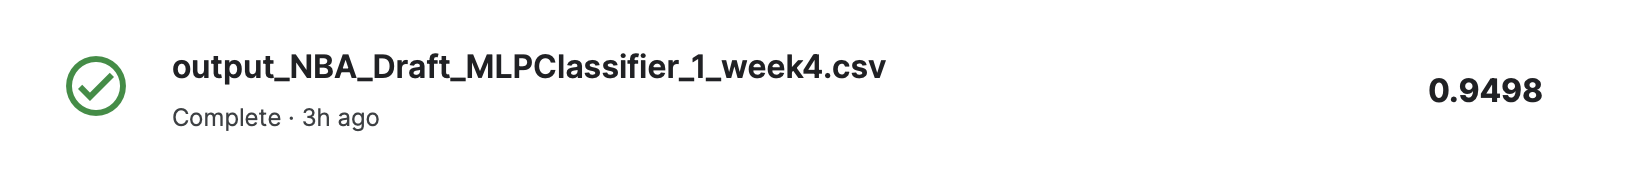

In [312]:
outpot_df= pd.read_csv('../notebooks/output_NBA_Draft_MLPClassifier_1_week4.csv')

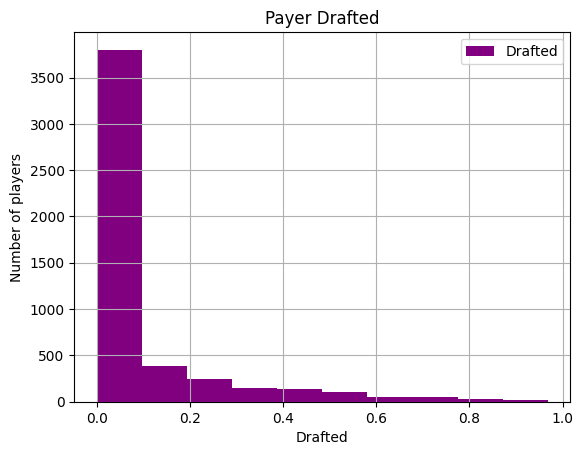

In [313]:
y=outpot_df['drafted']
plt.hist(y, label='Drafted', color='purple')
plt.xlabel('Drafted')
plt.ylabel('Number of players')
plt.title('Payer Drafted')
plt.legend()
plt.grid(True)

# Show the plot
plt.show()